<a href="https://colab.research.google.com/github/22P31A0594/codemind-java/blob/main/employee_burn_out_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import pickle as pickle
import os

In [ ]:
data=pd.read_excel("/content/employee_burnout_analysis-AI.xlsx")

In [ ]:
data.head()

Employee ID Date of Joining  Gender Company Type  \
0  fffe32003000360033003200      2008-09-30  Female      Service   
1      fffe3700360033003500      2008-11-30    Male      Service   
2  fffe31003300320037003900      2008-03-10  Female      Product   
3  fffe32003400380032003900      2008-11-03    Male      Service   
4  fffe31003900340031003600      2008-07-24  Female      Service   

  WFH Setup Available  Designation  Resource Allocation  Mental Fatigue Score  \
0                  No            2                  3.0                   3.8   
1                 Yes            1                  2.0                   5.0   
2                 Yes            2                  NaN                   5.8   
3                 Yes            1                  1.0                   2.6   
4                  No            3                  7.0                   6.9   

   Burn Rate  
0       0.16  
1       0.36  
2       0.49  
3       0.20  
4       0.52

In [ ]:
data.tail()

Employee ID Date of Joining  Gender Company Type  \
22745  fffe31003500370039003100      2008-12-30  Female      Service   
22746  fffe33003000350031003800      2008-01-19  Female      Product   
22747          fffe390032003000      2008-11-05    Male      Service   
22748  fffe33003300320036003900      2008-01-10  Female      Service   
22749      fffe3400350031003800      2008-01-06    Male      Product   

      WFH Setup Available  Designation  Resource Allocation  \
22745                  No            1                  3.0   
22746                 Yes            3                  6.0   
22747                 Yes            3                  7.0   
22748                  No            2                  5.0   
22749                  No            3                  6.0   

       Mental Fatigue Score  Burn Rate  
22745                   NaN       0.41  
22746                   6.7       0.59  
22747                   NaN       0.72  
22748                   5.9       0.52  
22749                   7.8       0.61

In [ ]:
data.describe()

Date of Joining   Designation  Resource Allocation  \
count                          22750  22750.000000         21369.000000   
mean   2008-07-01 09:28:05.274725120      2.178725             4.481398   
min              2008-01-01 00:00:00      0.000000             1.000000   
25%              2008-04-01 00:00:00      1.000000             3.000000   
50%              2008-07-02 00:00:00      2.000000             4.000000   
75%              2008-09-30 00:00:00      3.000000             6.000000   
max              2008-12-31 00:00:00      5.000000            10.000000   
std                              NaN      1.135145             2.047211   

       Mental Fatigue Score     Burn Rate  
count          20633.000000  21626.000000  
mean               5.728188      0.452005  
min                0.000000      0.000000  
25%                4.600000      0.310000  
50%                5.900000      0.450000  
75%                7.100000      0.590000  
max               10.000000      1.000000  
std                1.920839      0.198226

In [ ]:
data.nunique()

Employee ID             22750
Date of Joining           366
Gender                      2
Company Type                2
WFH Setup Available         2
Designation                 6
Resource Allocation        10
Mental Fatigue Score      101
Burn Rate                 101
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [ ]:
data.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [ ]:
data.isnull().sum().values.sum()

4622

In [ ]:
data.corr(numeric_only=True)['Burn Rate'][:-1]

Designation             0.737556
Resource Allocation     0.856278
Mental Fatigue Score    0.944546
Name: Burn Rate, dtype: float64

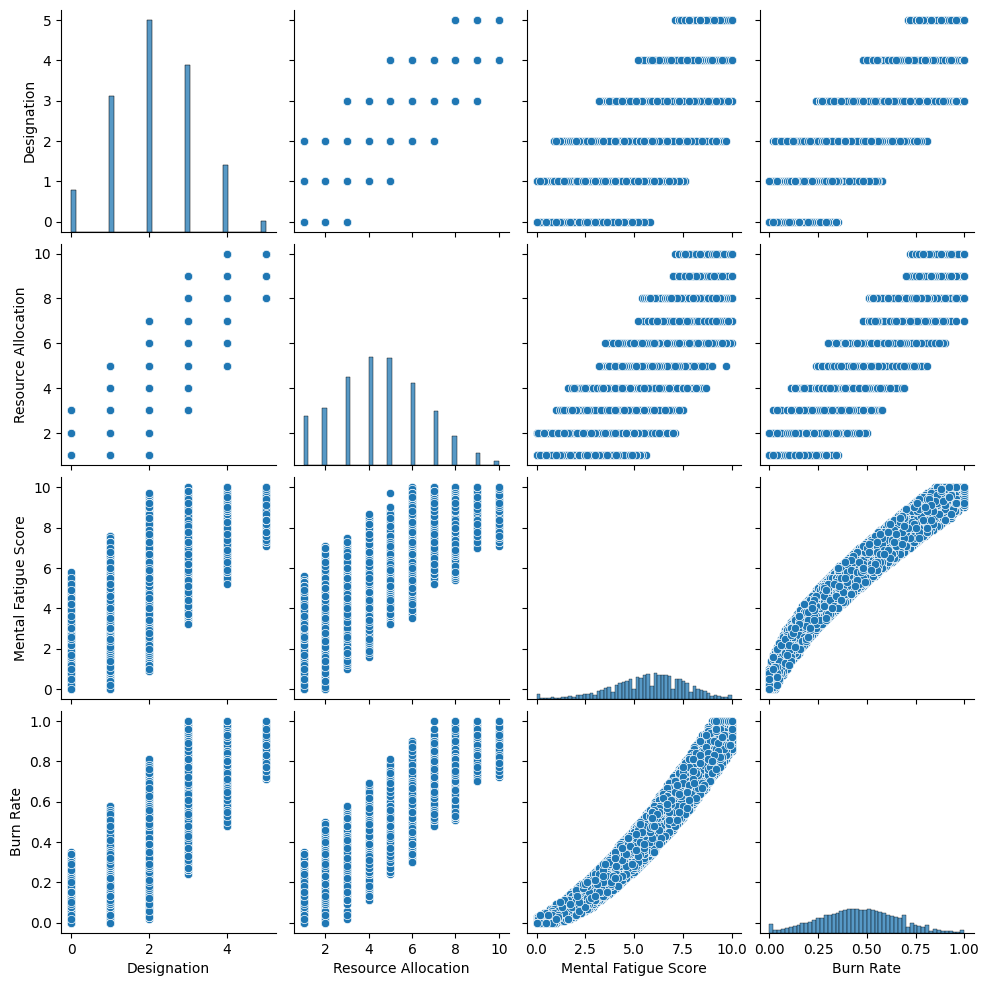

In [ ]:
sns.pairplot(data)


In [ ]:
data=data.dropna()

In [ ]:
data.shape

(18590, 9)

In [ ]:
data.dtypes

Employee ID                     object
Date of Joining         datetime64[ns]
Gender                          object
Company Type                    object
WFH Setup Available             object
Designation                      int64
Resource Allocation            float64
Mental Fatigue Score           float64
Burn Rate                      float64
dtype: object

In [ ]:
data=data.drop('Employee ID',axis=1)

In [ ]:
data_month=data.copy()
print(f"Min date{data['Date of Joining'].min()}")
print(f"Max date{data['Date of Joining'].max()}")


Min date2008-01-01 00:00:00
Max date2008-12-31 00:00:00


In [ ]:
data.corr(numeric_only=True)['Burn Rate'][:-1]

Designation             0.736412
Resource Allocation     0.855005
Mental Fatigue Score    0.944389
Name: Burn Rate, dtype: float64

In [ ]:
data.corr(numeric_only=True)['Burn Rate'][:-1]

Designation             0.736412
Resource Allocation     0.855005
Mental Fatigue Score    0.944389
Name: Burn Rate, dtype: float64

In [ ]:
data=data.dropna()

In [ ]:
data.shape

(18590, 8)

In [ ]:
data.columns.tolist()

['Date of Joining',
 'Gender',
 'Company Type',
 'WFH Setup Available',
 'Designation',
 'Resource Allocation',
 'Mental Fatigue Score',
 'Burn Rate']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18590 entries, 0 to 22749
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date of Joining       18590 non-null  datetime64[ns]
 1   Gender                18590 non-null  object        
 2   Company Type          18590 non-null  object        
 3   WFH Setup Available   18590 non-null  object        
 4   Designation           18590 non-null  int64         
 5   Resource Allocation   18590 non-null  float64       
 6   Mental Fatigue Score  18590 non-null  float64       
 7   Burn Rate             18590 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 1.3+ MB


In [ ]:
data.dtypes

Date of Joining         datetime64[ns]
Gender                          object
Company Type                    object
WFH Setup Available             object
Designation                      int64
Resource Allocation            float64
Mental Fatigue Score           float64
Burn Rate                      float64
dtype: object

In [ ]:
data_2008=pd.to_datetime(["2008-01-01"]*len(data))
data["Days"]=data['Date of Joining'].astype('datetime64[ns]').sub(data_2008).dt.days
data.Days

0        273
1        334
3        307
4        205
5        330
        ... 
22743    349
22744    147
22746     18
22748      9
22749      5
Name: Days, Length: 18590, dtype: int64

Min date2008-01-01 00:00:00
Max date2008-12-31 00:00:00


<Axes: xlabel='Month', ylabel='Hired employee'>

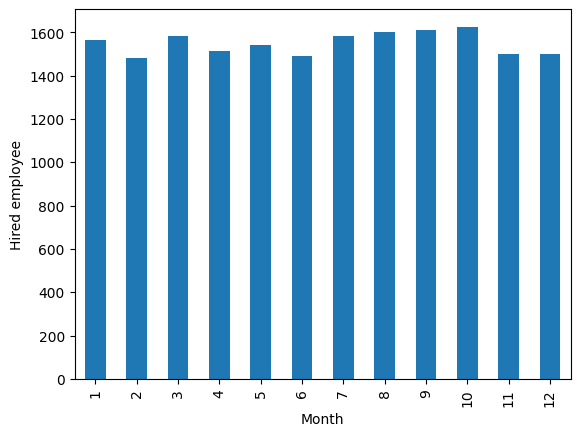

In [ ]:
print(f"Min date{data['Date of Joining'].min()}")
print(f"Max date{data['Date of Joining'].max()}")
data_month=data.copy()
data_month['Date of Joining']=data_month['Date of Joining'].astype('datetime64[ns]')
data_month['Date of Joining'].groupby(data_month['Date of Joining'].dt.month).count().plot(kind="bar",xlabel="Month",ylabel="Hired employee")

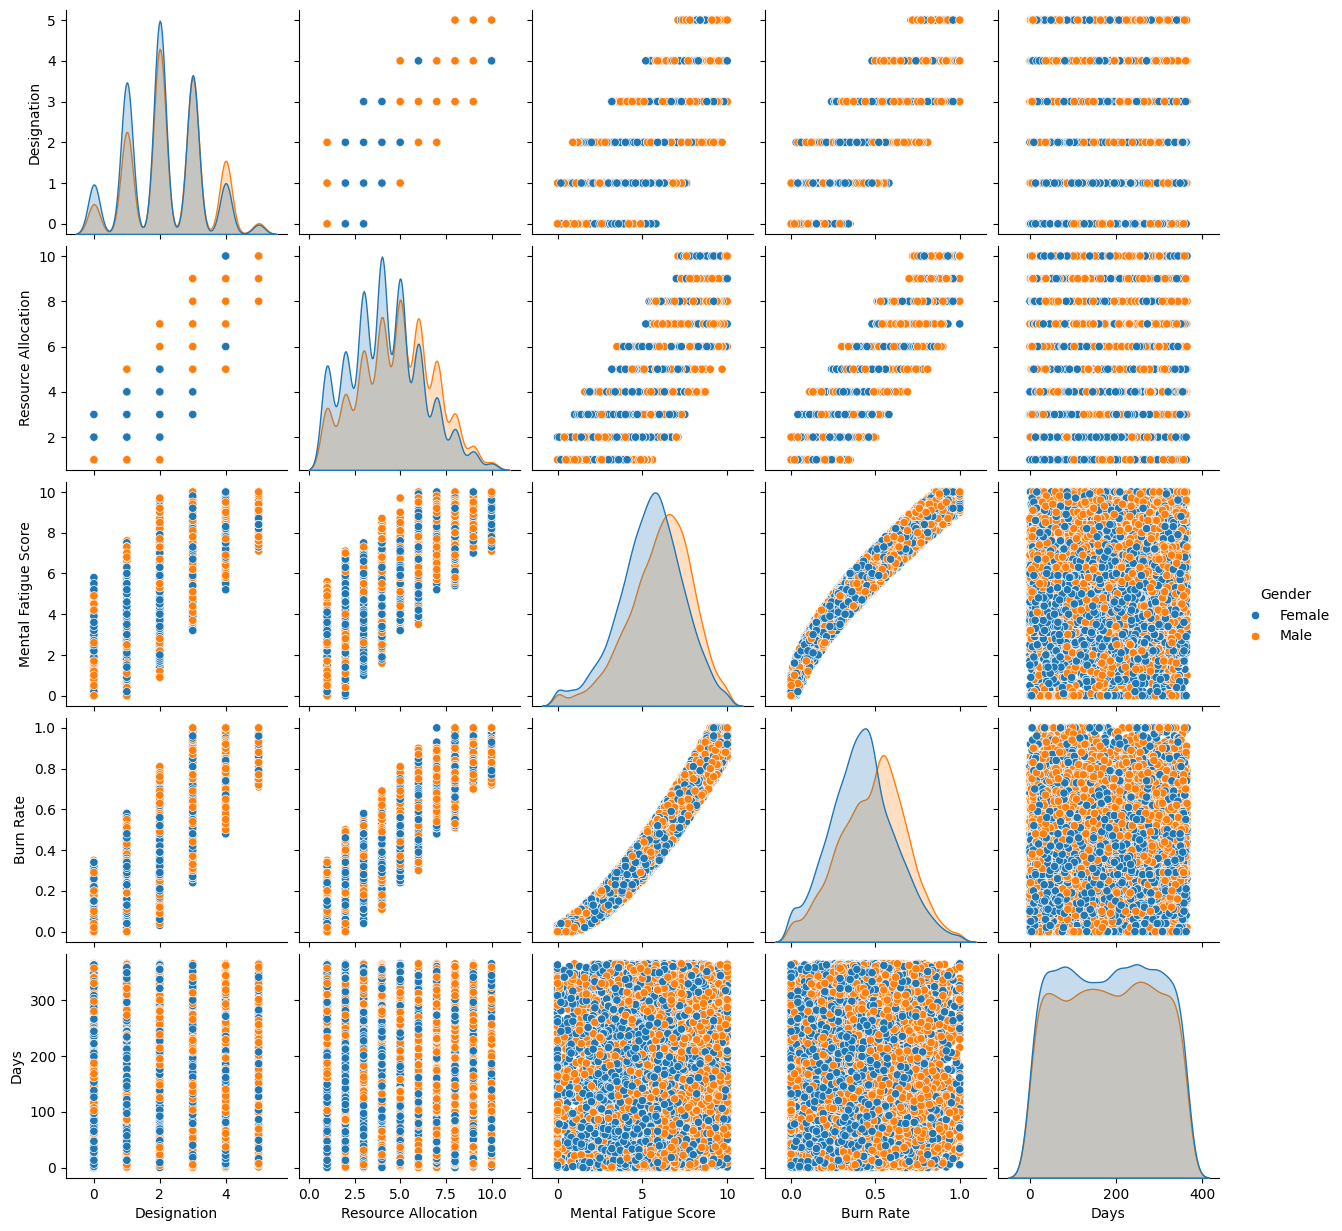

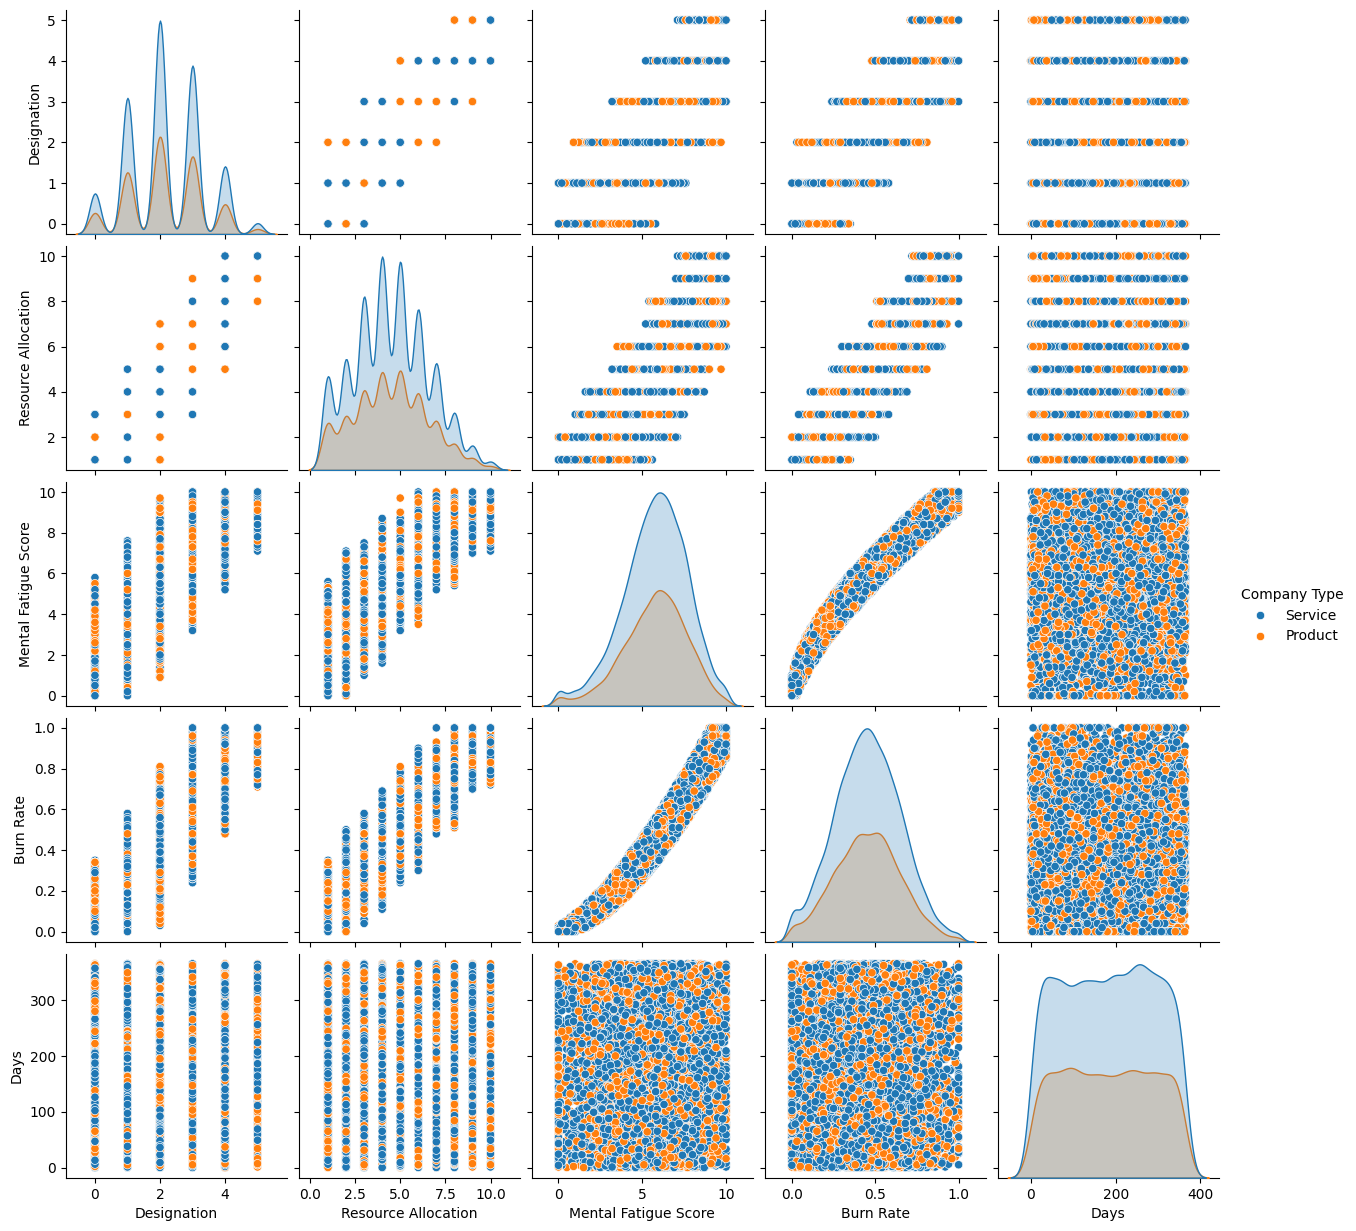

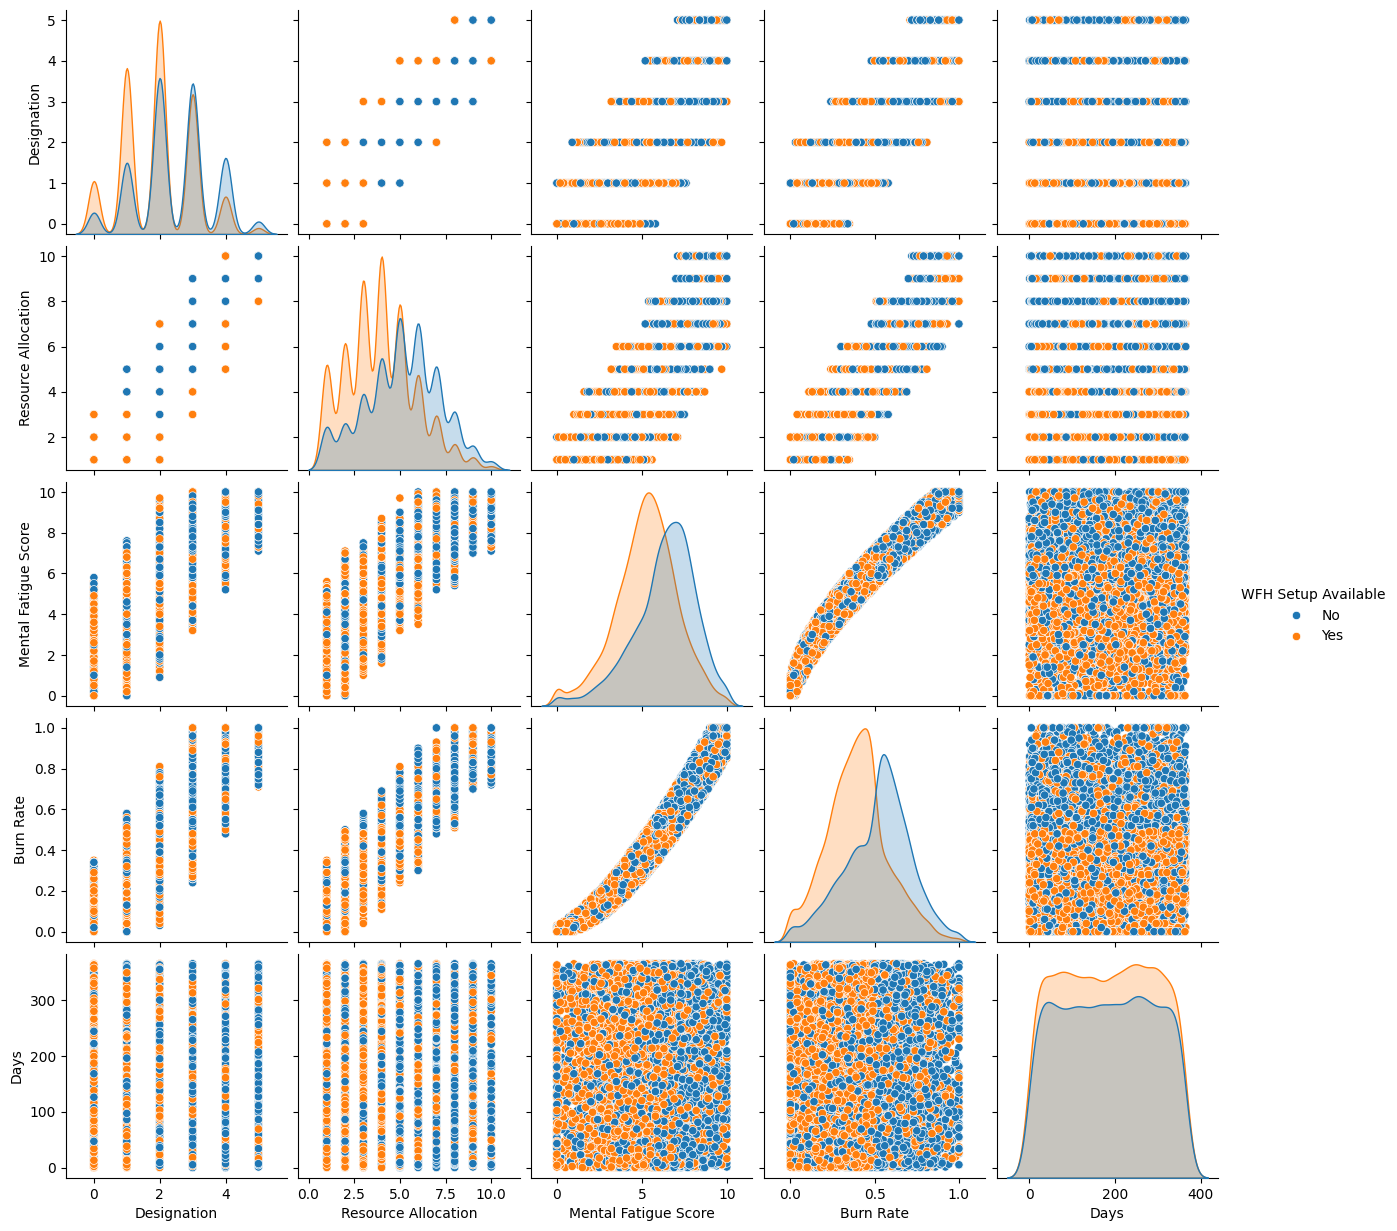

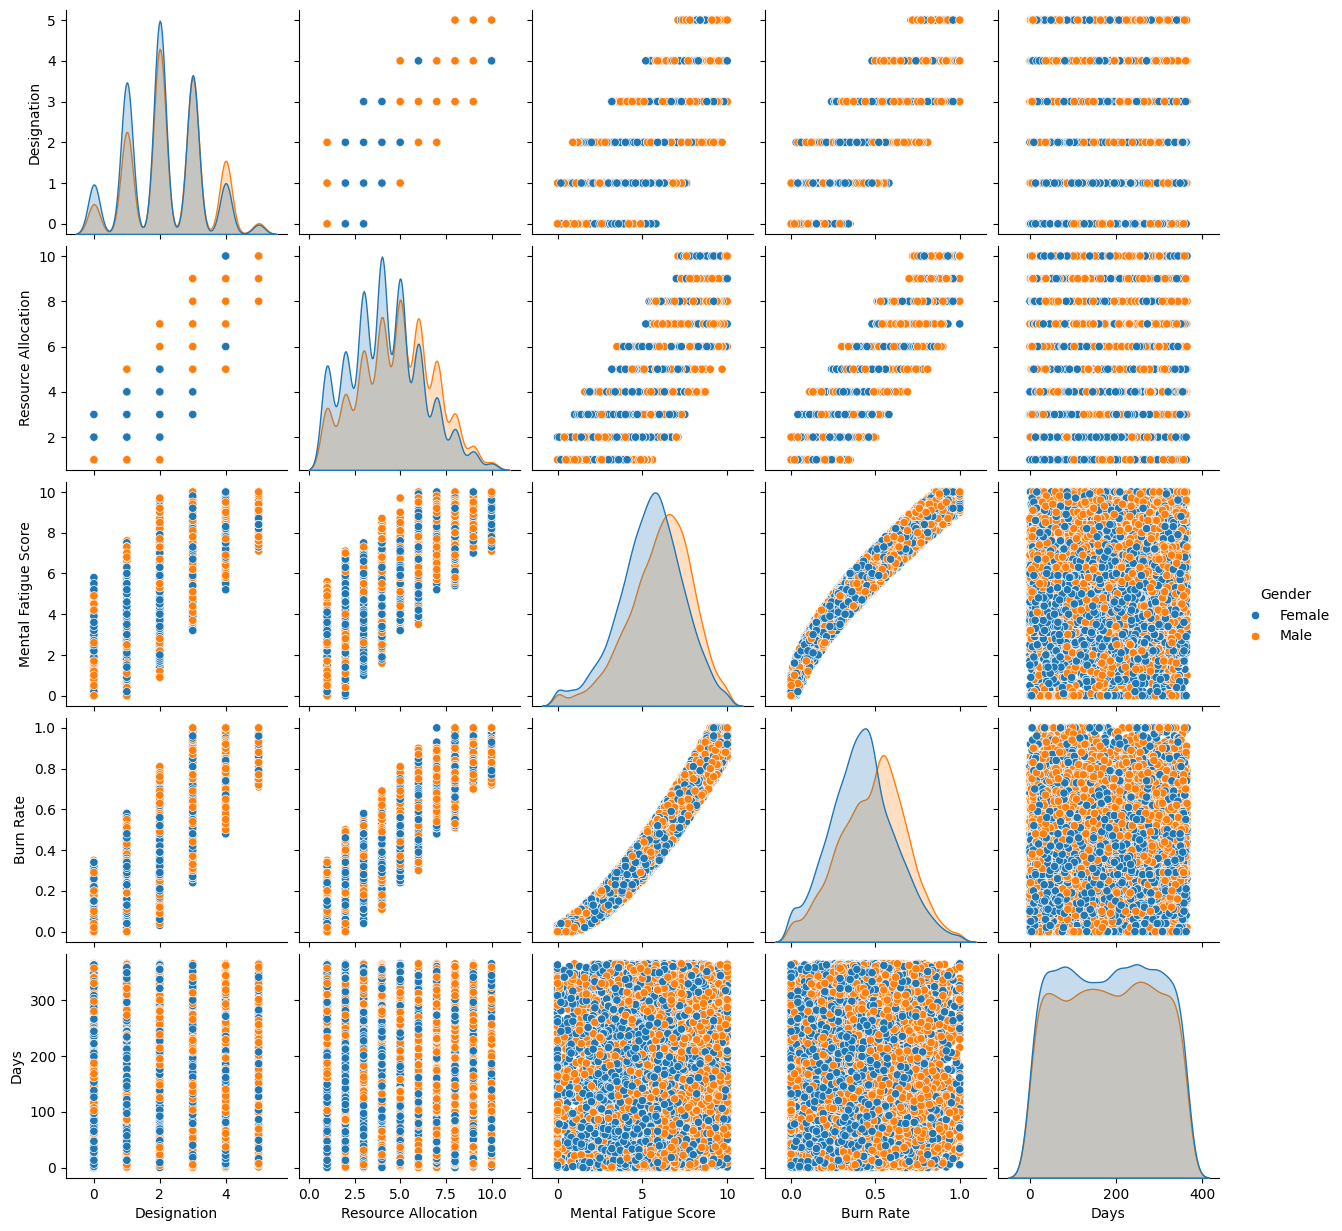

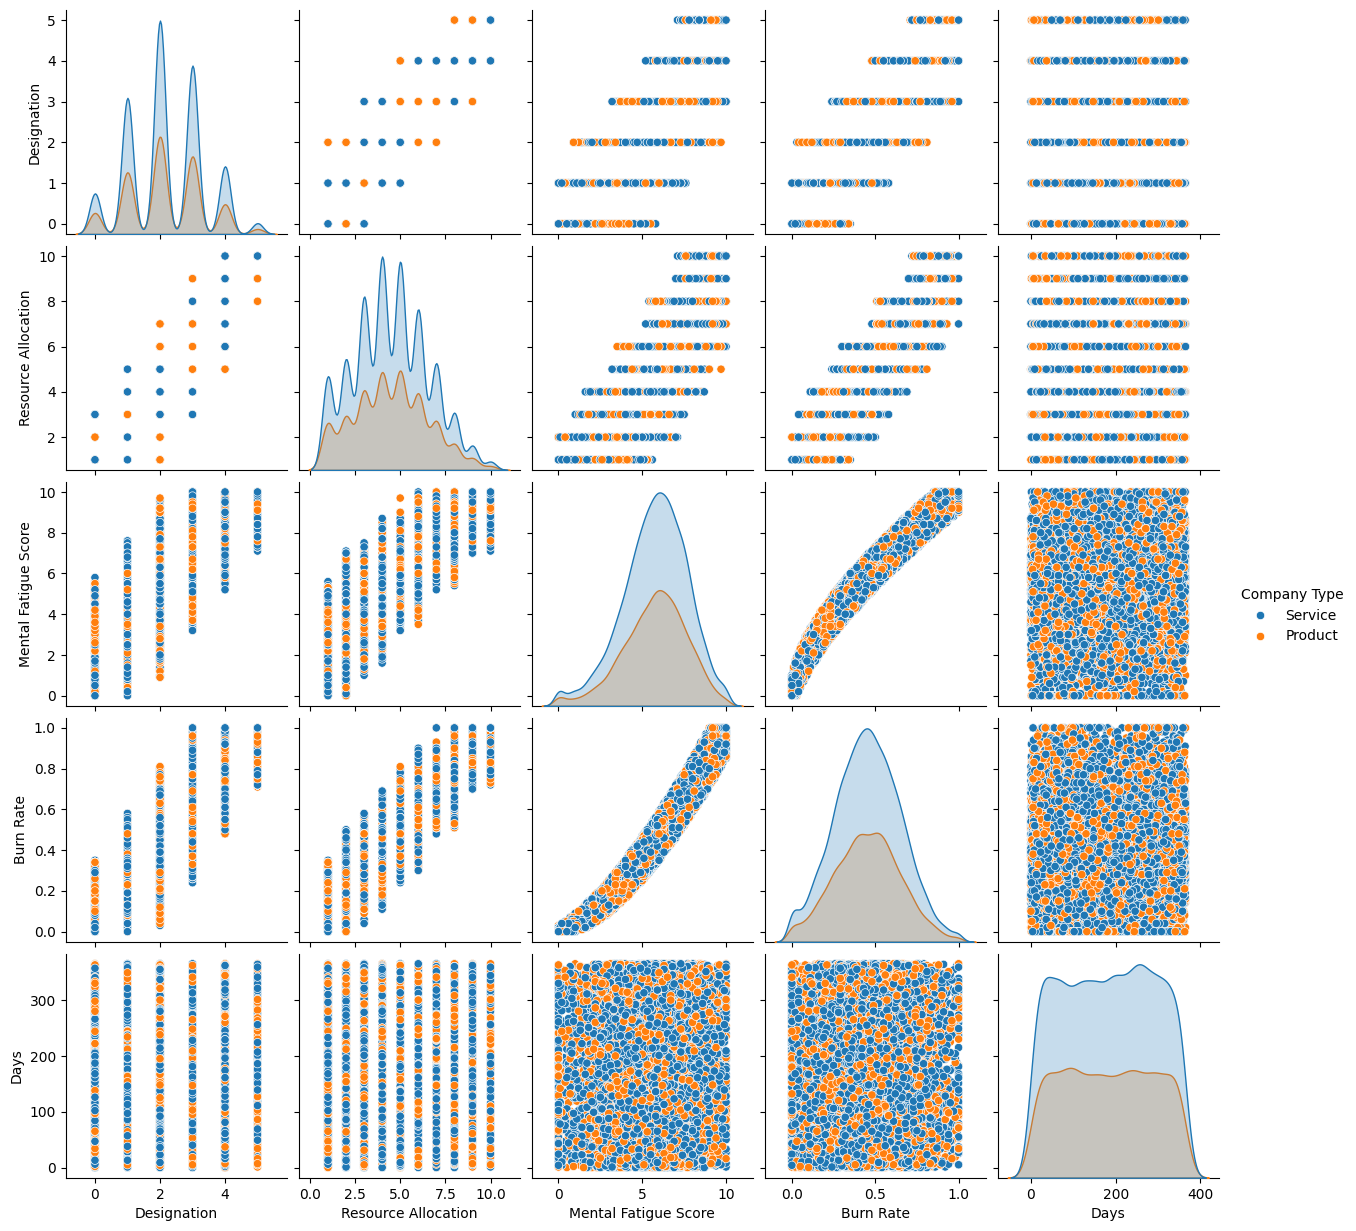

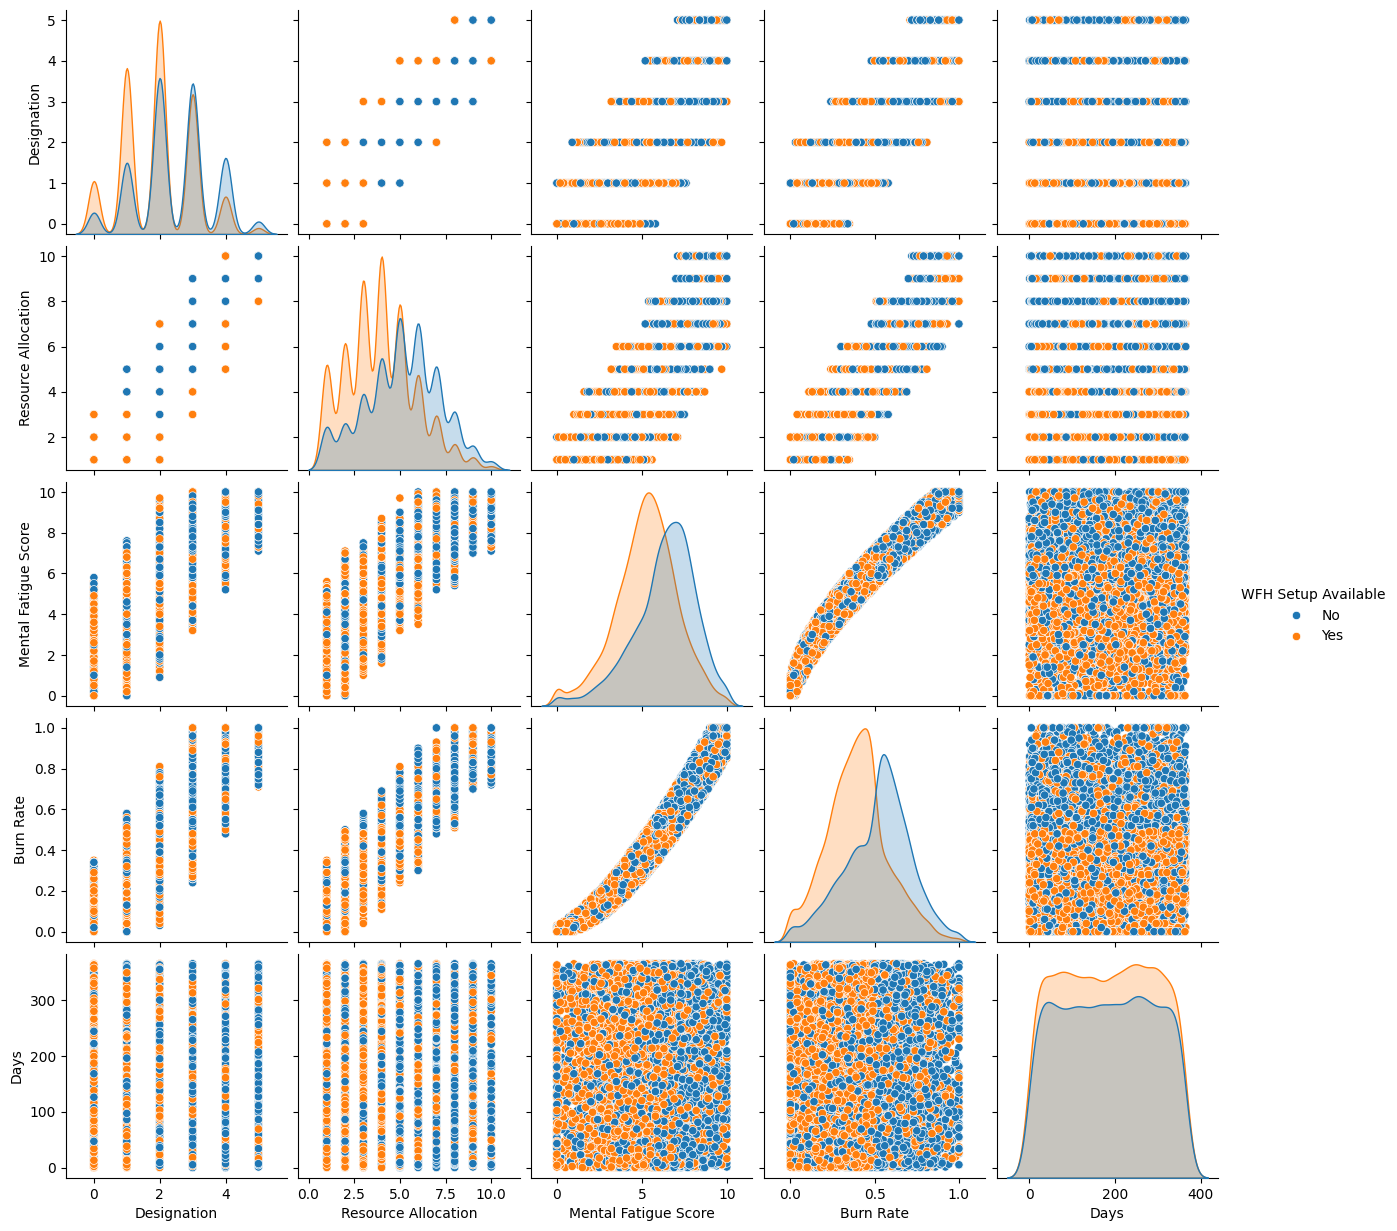

In [ ]:
for c in data.select_dtypes(object).columns:
    sns.pairplot(data, hue=c)
plt.show()

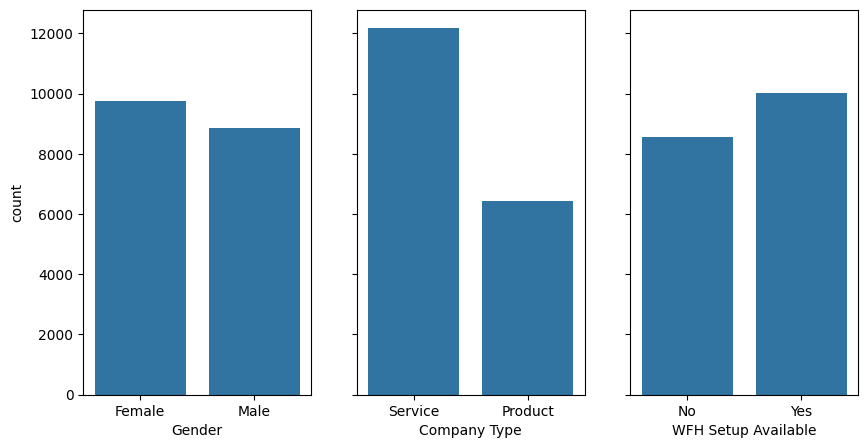

In [ ]:
cat_columns = data.select_dtypes(object).columns
fig, ax = plt.subplots(nrows=1, ncols=len(cat_columns), sharey=True, figsize=(10, 5))
for i, c in enumerate(cat_columns):
    sns.countplot(x=c, data=data, ax=ax[i])
plt.show()

In [ ]:
# Split df into X and y
y = data['Burn Rate']
X = data.drop('Burn Rate', axis=1)


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns )

TypeError: float() argument must be a string or a real number, not 'Timestamp'

In [ ]:
import os
import pickle

scaler_filename = '../models/scaler.pkl'
scaler_directory = os.path.dirname(scaler_filename)

# Create the directory if it does not exist
if not os.path.exists(scaler_directory):
    os.makedirs(scaler_directory)

# Use pickle to save the scaler to the file
with open(scaler_filename, 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)


In [ ]:
X_train

Date of Joining  Gender Company Type WFH Setup Available  Designation  \
8977       2008-07-24    Male      Service                  No            3   
14115      2008-10-16  Female      Service                  No            2   
8797       2008-01-28  Female      Service                  No            3   
1173       2008-07-08  Female      Product                  No            1   
1941       2008-04-17    Male      Product                 Yes            2   
...               ...     ...          ...                 ...          ...   
13453      2008-03-17  Female      Product                 Yes            3   
21179      2008-07-10    Male      Service                 Yes            3   
6327       2008-08-14    Male      Service                  No            3   
14933      2008-03-20    Male      Service                  No            2   
288        2008-12-26  Female      Product                  No            2   

       Resource Allocation  Mental Fatigue Score  Days  
8977                   5.0                   5.6   205  
14115                  5.0                   3.9   289  
8797                   5.0                   7.6    27  
1173                   2.0                   4.6   189  
1941                   6.0                   8.0   107  
...                    ...                   ...   ...  
13453                  7.0                   8.9    76  
21179                  5.0                   3.7   191  
6327                   5.0                   5.9   226  
14933                  5.0                   7.1    79  
288                    5.0                   7.8   360  

[13013 rows x 8 columns]

In [ ]:
y_train

8977     0.41
14115    0.34
8797     0.61
1173     0.35
1941     0.61
         ... 
13453    0.78
21179    0.30
6327     0.42
14933    0.54
288      0.57
Name: Burn Rate, Length: 13013, dtype: float64

In [ ]:
import os

# Define the path
path = '../data/processed/'

# Create the directory if it does not exist
if not os.path.exists(path):
    os.makedirs(path)

# Save the data to CSV files
X_train.to_csv(os.path.join(path, 'X_train_processed.csv'), index=False)
y_train.to_csv(os.path.join(path, 'y_train_processed.csv'), index=False)


In [79]:
#from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression class
linear_regression_model = LinearRegression()
# Train the model
linear_regression_model.fit(X_train, y_train)

TypeError: float() argument must be a string or a real number, not 'Timestamp'

In [80]:
#Linear Regressing Model Performance Metrics

print("Linear Regression Model Performance Metrics:\n")
# Make predictions on the test set
y_pred = linear_regression_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

Linear Regression Model Performance Metrics:



TypeError: float() argument must be a string or a real number, not 'Timestamp'

In [ ]:
feature_names = X.columns.tolist()
feature_names

['Date of Joining',
 'Gender',
 'Company Type',
 'WFH Setup Available',
 'Designation',
 'Resource Allocation',
 'Mental Fatigue Score',
 'Days']

In [ ]:
 #Save the model to a file
model_filename = '../models/linear_regression.pkl'
with open (model_filename ,'wb') as  model_file:
    pickle.dump(linear_regression_model, model_file)


**Support Vector Machine**

In [ ]:
from sklearn.svm import LinearSVR

# Create the model with the correct parameters
SVMLinear = LinearSVR(dual=True, C=1.0, max_iter=1000, random_state=42)

# Fit the model
SVMLinear.fit(X_train, y_train)

TypeError: float() argument must be a string or a real number, not 'Timestamp'

In [ ]:
#Support Vector Machine (RBF Kernel) Performance Metrics
print("Support Vector Machine (RBF Kernel) Performance Metrics\n")
# Make predictions on the test set
y_pred = SVMRbf.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

Support Vector Machine (RBF Kernel) Performance Metrics



NameError: name 'SVMRbf' is not defined

**Random Forest Regressor**

In [83]:
RandomForest = RandomForestRegressor()
RandomForest.fit(X_train,y_train)


NameError: name 'RandomForestRegressor' is not defined

In [ ]:
#RandomForestRegressor Performance Metrics
print("RandomForestRegressor Performance Metrics\n")
# Make predictions on the test set
y_pred = RandomForest.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

RandomForestRegressor Performance Metrics



NameError: name 'RandomForest' is not defined